**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Fluoride Salt Cooled High-Temperature Channel Flow
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  Austin Rotker <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**25Apr2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
 + [Tests](#tests)
   - [Fuel](#fuel)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The Fluoride-Cooled High Temperature Reactor (FHR) is a generation IV design which boasts attractive safety features and economic properties; The FLIBE/NAFZIRF coolant proposed for use in FHRs is supplied to the secondary coolant loop at temperatures approaching 700 $^{\circ}$C, far in excess of outflow coolant temperatures seen in water-cooled designs, which results in higher Brayton cycle efficiency and opens the door for use in applications that can take advantage of very high temperature process heat. Furthermore, cooling during shutdown is accomplished through natural convection, improving safety and reliability as well as lowering capital costs significantly.

The particular design of interest shares similarities with a High Temperature Gas-Cooled Reactor (HTGR). Fuel is present as compacts encapsulated in a graphite prismatic core. The flow of salt through an annular cylindrical space is of interest to this design, therefore the present study analyses the conjugated heat transport between salt and solid fuel. The resulting mathematical problem has two field equations coupled at a domain interface.

## [Problem Statement](#toc)<a id="problem"></a>

Solve the Peclet heat transfer equation for the coolant temperature field 
mixture velocity $\Tc:\Omegac\subset\Reals^2\rightarrow\Reals$, and the Poisson equation for the fuel temperature field $\Tf:\Omegaf\subset\Reals^2\rightarrow\Reals$ such that

\begin{align*}
\rho c_p\,\gradx\Tc\cdot\velocity &= - \divx\fluxc \quad &\forall \quad \xpoint\in\Omegac, \\
                                0 &= - \divx\fluxf + S \quad &\forall \quad \xpoint\in\Omegaf,
\end{align*}

with the following boundary conditions for the salt

\begin{align*}
 \Tc(r, 0) &= {\Tc}_0 \quad &0 \le r \le \Ri \quad & \text{inflow}, \\
 q_{\text{c},z}(r, L) &= 0 \quad &0 \le r \le \Ri  \quad & \text{outflow}, \\
 q_{\text{c},r}(0, z) &= 0 \quad &0 \le z \le L \quad & \text{centerline},
\end{align*}

and the following boundary conditions for the fuel

\begin{align*}
 q_{\text{f},z}(r, 0) &= 0 \quad &\Ri \le r \le \Ro \quad & \text{bottom}, \\
 q_{\text{f},z}(r, L) &= 0 \quad &\Ri \le r \le \Ro \quad & \text{top}, \\
 q_{\text{f},r}(\Ro, z) &= h_\text{o}\,\bigl(\Tf(\Ro, z) - T_\infty(z)\bigr) \quad &0 \le z \le L \quad & \text{external surface}.
\end{align*}

A separate and independent model is required for the the interface between coolant and fuel, that is

\begin{align*}
 q_{\text{c},r}(\Ri, z) &= q_{\text{f},r}(\Ri, z) \quad &0 \le z \le L \quad & \text{normal heat flux continuity} \\
 \Tf(\Ri, z) - \Tc(\Ri,z) &= -\frac{1}{h_\text{i}} q_{\text{c},r}(\Ri, z) + C_\text{i}\,\Tf \quad &0 \le z \le L \quad & \text{temperature jump} .
\end{align*}

That is, no interfacial thermal resistance is taken into account, therefore the normal heat flux is continuous at the interface. A temperature jump at the interface exists as a function of the interfacial normal flux and the temperature in the fuel. The coefficients $h_\text{i}$ (convective heat transfer) and $0 \le C_\text{i} < 1$ (interface adsorption) try to capture the underlying interfacial phenomena of thermal energy transfer.

### Domain
Consider FLIBE coolant flowing with a constant velocity $u$ = 2 m/s through the outer coolant flow channels of the graphite block, with outer radius $\Ro$ = 11.4 cm, inner radius $\Ri$ = 10cm, and active length $L$ = 12.0 m. Assume no cross flow from the reactor channel into the outer coolant flow channel, and vice versa. That salt enters the bottom of the flow channels with constant temperature ${\Tc}_0$ = 600$^{\circ}$C.

In [1]:
'''Domain'''

def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    height = 4.5*(3/4+2*1)
    radius_i = 3/4 / 2
    radius_o = radius_i + 1
    coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    pin = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o)
    coolant_o = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o + 1)

    plo = pv.Plotter(notebook=True, shape=(1,2)) 

    plo.subplot(0,0)
    plo.add_mesh(coolant, color='red', opacity=1.0,)
    plo.add_mesh(pin, color='tan', opacity=0.99)
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')

    pin = pin.triangulate()
    tmp = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*1.1, radius=radius_i).triangulate()
    tmp.flip_normals()

    pin = pin.boolean_cut(tmp)
    plo.subplot(0,1)
    plo.add_mesh(pin, 'grey')
    plo.add_mesh(pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*.98, radius=radius_i), 'red')
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

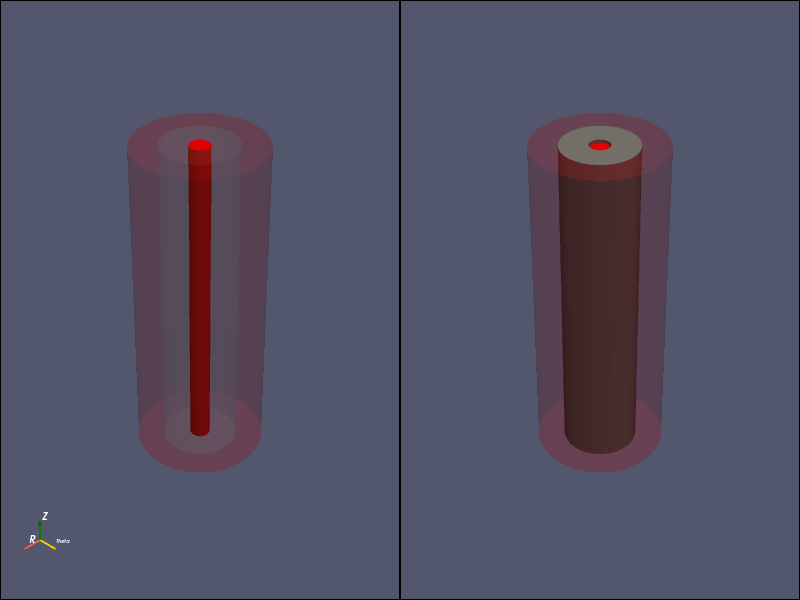

In [3]:
show_domain()

## [Objectives](#toc)<a id="obj"></a>

- State a consistent Galerkin weak form of the [strong problem](#problem).
- Apply finite element basis functions from MOOSE/Libmesh to obtain an algebraic system of equations.
- Using MOOSE/PETSc solvers, compute the temperature fields in the salt and fuel domains in steady state.

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The weak form on the coolant domain is: find $\Tc \in H^1\!\bigl(\Omegac\bigr)$ such that

\begin{align*}
 \int_{\Omegac} \rho_\text{c} c_{p,\text{c}}\, \grad_\xpoint \Tc \cdot \velocity \, \wc \, da
 - \int_{\Omegac} \fluxc \cdot \grad_\xpoint \wc \, da &= 0 \quad \forall \quad \wc \in H^1_0\!\bigl(\Omegac\bigr), 
\end{align*}

where $H^1\!\bigl(\Omegac\bigr) := \bigl\{ \Tc:\Omegac\subset\Reals^2\rightarrow \Reals \mid \int_{\Omegac} \grad_\xpoint \Tc\cdot\grad_\xpoint \Tc\,da < \infty \bigr\}$ and 
$H^1_0\!\bigl(\Omegac\bigr) := \bigl\{ \wc \mid \wc \in H^1(\Omegac), \wc(r,0) = 0 \ \ \forall \ \ 0 \le r \le \Ri \bigr\}$. 
Both function sets, as just defined, are Hilbert spaces. $\wc$ is the coolant test function. It assumes zero value on the inflow boundary of the domain.

<br>

The weak form on the fuel domain is: find $\Tf \in H^1\!\bigl(\Omegaf\bigr)$ such that

\begin{align*}
 - \int_{\Omegaf} \fluxf \cdot \grad_\xpoint \wf \, da 
 + \int_{\partial{\Omegaf}_\text{o}} h_\text{o}\,\bigl(\Tf(\Ro, z) - T_\infty(z)\bigr) \wf \, dl
 - \int_{\Omegaf} S \, \wf \, da
 &= 0 \quad \forall \quad w_\text{f} \in H^1\!\bigl(\Omegaf\bigr).
\end{align*}

Note that the interface condition on temperature is what sets the temperature level on the fuel domain. However this has not been included in the forgoing yet. Therefore we add the weak forms of the interface conditions as follows:

\begin{align*}
\int_{\partial\Omega_I} \bigl(q_{\text{c},r}(\Ri, z) - q_{\text{f},r}(\Ri, z)\bigr) \, \wI \, dl &= 0 \quad \forall \quad \wI  \in L_2\!\bigl(\partial\Omega_\text{I}\bigr), \\
\int_{\partial\Omega_I} \Bigl( (1-C_\text{i})\,\Tf(\Ri, z) - \Tc(\Ri,z) + \frac{1}{h_\text{i}} q_{\text{c},r}(\Ri, z) \Bigr) \wI \, dl &= 0 \quad \forall \quad \wI  \in L_2\!\bigl(\partial\Omega_\text{I}\bigr)  .
\end{align*}

Note that the interface test function, $\wI$, could be discontinuous at the interface. 

When all combined, the weak forms above reproduce the solution of the [strong problem](#strong) if the strong solution is smooth enough. This can be verified by using the divergence theorem on the diffusion terms to obtain an inner product with the test functions. Under some smooth conditions, the weak solution also solves the strong problem.

The numerical solution will be obtained by implementing a finite element approximation of the Hilbert spaces above using finitel element basis functions. The MOOSE framework will be used as described next.

### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the [weak form](#weakform):
1. Heat conduction by diffusion (coolant and fuel):
 + [definition](./include/kernels/HeatConduction.h) and [implementation](./src/kernels/HeatConduction.C).
1. Heat convection on the coolant domain:
 + [definition](./include/kernels/HeatConvection.h) and [implementation](./src/kernels/HeatConvection.C).
1. Surface heat transfer on the fuel exterior surface:
 + [definition](./include/kernels/HeatConvection.h) and [implementation](./src/kernels/HeatConvection.C).

### [Setup](#toc)<a id="setup"></a>

In [ ]:
'''Domain'''

x_a = 0
x_b = 1000

x_length = x_b - x_a

In [ ]:
'''Parameters'''

diff_coeff = 2.04
s_source = 0

In [ ]:
'''Data (boundary conditions)'''

u_a = 4.17
transfer_coeff_right = 2.0

### [Tests](#toc)<a id="tests"></a>

#### [Fuel](#toc)<a id="fuel"></a>

In [ ]:
'''FEM Solution'''

n_felem = 10

order = 'first'

n_plot_pts = n_felem + 1

from tools.toolkit import write_engy5310_p1_1d_input_file

write_engy5310_p1_1d_input_file(x_left=x_a, x_right=x_b, 
                                u_left=u_a, 
                                transfer_coeff_right=transfer_coeff_right,
                                diff_coeff=diff_coeff,
                                n_felem=n_felem, order=order, 
                                n_plot_pts=n_plot_pts,
                                use_moose_neumann_bc=True,
                                file_name='input.hit')

In [ ]:
'''Input file'''
!cat input.hit

In [ ]:
'''Run Engy5310P1 MOOSE App'''

!./fhr-opt -i input.hit

In [ ]:
'''Show 2D solution'''

import pyvista as pv
poisson = pv.read('out_000_0.vtu')
plo = pv.Plotter()   
plo.add_mesh(poisson, scalars='T', cmap='plasma', stitle='Temperature [K]')
plo.add_axes(xlabel='R', ylabel='Z', zlabel='Theta')
plo.set_viewup([1,0,0])
plo.screenshot('test.png')
cpos = plo.show(window_size=[800, 600])
#plotter.set_background('white')

## [Results and Analysis](#toc)<a id="ranalysis"></a>

In [ ]:
'''Show 2D solution'''

import pyvista as pv
poisson = pv.read('out_000_0.vtu')
plo = pv.Plotter()   
plo.add_mesh(poisson, scalars='T', cmap='plasma', stitle='Temperature [K]')
plo.add_axes(xlabel='R', ylabel='Z', zlabel='Theta')
plo.set_viewup([1,0,0])
plo.screenshot('test.png')
cpos = plo.show(window_size=[800, 600])
#plotter.set_background('white')

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] Andreades, Charalampos et. al, [*Technical Description of the “Mark 1” Pebble-Bed Fluoride-Salt-Cooled High-Temperature Reactor (PB-FHR) Power Plant*](https://web.mit.edu/nse/pdf/researchstaff/forsberg/FHR%20Point%20Design%2014-002%20UCB.pdf), University of California Berkely, Dept. of Nuclear Engineering. 2014. 
- [4] author, [reference]()